In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [4]:
data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
train = data_1.append(data_2, ignore_index=True)
train = train.append(data_3, ignore_index=True)
train = train.append(data_4, ignore_index=True)
train.head()

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,ped,pid,sportsCategory,subBrand,technologies,type,url,price,territories,type5
0,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,011040,Black/Footwear White,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/world-cup-fussballschuh/...,NaN,NaN,NaN
1,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,015110,Black/Footwear White/Black,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/copa-mundial-fussballsch...,NaN,NaN,NaN
2,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019000,Black/Footwear White,schwarz,...,NaN,04/18/2013,Freizeit,Performance,EVA,NaN,https://www.adidas.de/samba-leather-schuh/0190...,NaN,NaN,NaN
3,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019099,Black/White,schwarz,...,NaN,01/28/2015,Freizeit,Sport inspired,EVA,NaN,https://www.adidas.de/samba-super-schuh/019099...,NaN,NaN,NaN
4,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019228,Black/Footwear White/Red,schwarz,...,NaN,04/18/2013,Fußball,Performance,TRAXION|EVA,NaN,https://www.adidas.de/mundial-team-fussballsch...,NaN,NaN,NaN


In [102]:
# train_1 = data_1.append(data_2, ignore_index=True)
# train_1 = train_1.append(data_3, ignore_index=True)
# train_1 = train_1.append(data_4, ignore_index=True)
# train_1.to_csv("Data_combined.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440035 entries, 0 to 440034
Data columns (total 31 columns):
date               440035 non-null object
name               440035 non-null object
currency           440035 non-null object
language           440035 non-null object
name2              440035 non-null object
name3              439667 non-null object
ageGroup           429726 non-null object
articleId          439667 non-null object
colors             429990 non-null object
colorGroup         402469 non-null object
consumerRating     439667 non-null float64
currentPrice       439667 non-null float64
description        435002 non-null object
discountedSince    162312 non-null object
division           439667 non-null object
gender             428672 non-null object
group              363326 non-null object
imageUrl           439631 non-null object
initialPrice       439667 non-null float64
modelNumber        439667 non-null object
name4              439664 non-null object
ped 

In [6]:
#train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
train.describe(include="all")

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,ped,pid,sportsCategory,subBrand,technologies,type,url,price,territories,type5
count,440035,440035,440035,440035,440035,439667,429726,439667,429990,402469,...,23308,439667,351277,346478,158390,165536,439667,344.000000,344,344
unique,4,9,3,3,3,1,31,80128,28826,206,...,6,484,111,18,1922,509,143793,NaN,5,64
top,08/29/2018,Nike,USD,en-US,USA,own eCom,adults,DJ1691,Black,Black,...,08/20/2018,08/06/2018,Lifestyle,Performance,Dri-FIT,Shorts,https://us.puma.com/en/us/pd/classics-logo-wom...,NaN,USA,Express
freq,114807,120211,181467,181467,181467,439667,356959,12,36686,85705,...,5620,28067,51612,248038,19491,6454,7,NaN,160,24
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.579419,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.219386,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.900000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.950000,NaN,NaN


In [7]:
print(f'Count Of Unique article ID : {len(train.articleId.unique())}')

Count Of Unique article ID : 80129


In [8]:
print(f'TotalRows: {len(train)}')

TotalRows: 440035


In [9]:
train.isnull().sum()

date                    0
name                    0
currency                0
language                0
name2                   0
name3                 368
ageGroup            10309
articleId             368
colors              10045
colorGroup          37566
consumerRating        368
currentPrice          368
description          5033
discountedSince    277723
division              368
gender              11363
group               76709
imageUrl              404
initialPrice          368
modelNumber           368
name4                 371
ped                416727
pid                   368
sportsCategory      88758
subBrand            93557
technologies       281645
type               274499
url                   368
price              439691
territories        439691
type5              439691
dtype: int64

In [10]:
print(f'Total Rows & Columns : {train.shape}')

Total Rows & Columns : (440035, 31)


<BarContainer object of 31 artists>

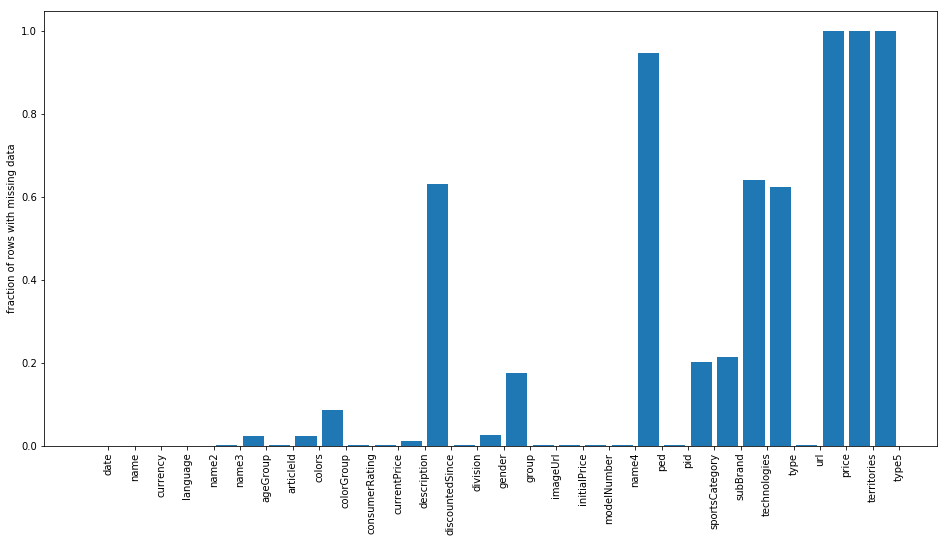

In [11]:
null_counts = train.isnull().sum()/len(train)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

Text(0.5,0,'prop. of missing values')

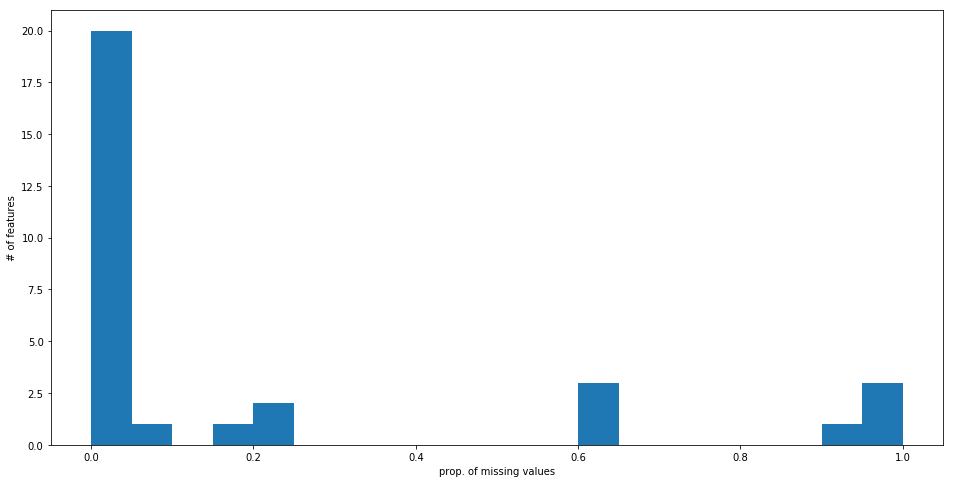

In [12]:
column_nans = train.isna().mean()
plt.figure(figsize=(16,8))
plt.hist(column_nans, bins = np.arange(0,1+.05,.05))
plt.ylabel('# of features')
plt.xlabel('prop. of missing values')

In [13]:
print(column_nans.sort_values())

date               0.000000
name               0.000000
currency           0.000000
language           0.000000
name2              0.000000
modelNumber        0.000836
division           0.000836
pid                0.000836
currentPrice       0.000836
consumerRating     0.000836
url                0.000836
articleId          0.000836
name3              0.000836
initialPrice       0.000836
name4              0.000843
imageUrl           0.000918
description        0.011438
colors             0.022828
ageGroup           0.023428
gender             0.025823
colorGroup         0.085370
group              0.174325
sportsCategory     0.201707
subBrand           0.212613
type               0.623812
discountedSince    0.631138
technologies       0.640051
ped                0.947031
territories        0.999218
price              0.999218
type5              0.999218
dtype: float64


In [14]:
train = train.drop("description", axis=1)
train = train.drop("colors", axis=1)
train = train.drop("discountedSince", axis=1)
train = train.drop("technologies", axis=1)
train = train.drop("imageUrl", axis=1)
train = train.drop("ped", axis=1)
train = train.drop("url", axis=1)

Text(0.5,0,'# of missing values')

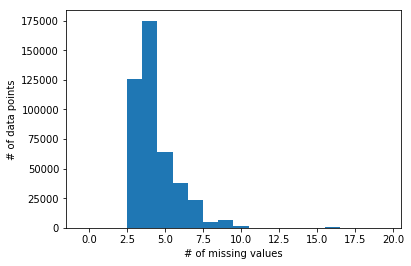

In [19]:
# How much data is missing in each row of the dataset?

row_nans = train.isna().sum(axis=1)

plt.hist(row_nans, bins = np.arange(-0.5,row_nans.max()+1,1))
#plt.yticks(np.arange(0,60000+10000,10000),['0','10k','20k','30k','40k','50k','60k'])
plt.ylabel('# of data points')
plt.xlabel('# of missing values')

In [20]:
pd.DataFrame({'freq'   : row_nans.value_counts().sort_index(),
              'cumfreq': row_nans.value_counts().sort_index().cumsum(),
              'cumprop': row_nans.value_counts().sort_index().cumsum() / train.shape[0]})

,freq,cumfreq,cumprop
3,125590,125590,0.285409
4,175003,300593,0.683112
5,63772,364365,0.828036
6,37749,402114,0.913823
7,23791,425905,0.967889
8,5133,431038,0.979554
9,6838,437876,0.995094
10,1791,439667,0.999164
16,344,440011,0.999945
19,24,440035,1.000000


In [22]:
# Number of company names
print(f'Brands: {train.name.unique()}')
print(f'Total: {len(train.name.unique())}')

Brands: ['adidas' 'Nike' 'Puma' 'Reebok' 'Under Armour' 'Lululemon' 'Asics'
 'Hurley' 'Jordan']
Total: 9


In [23]:
# Number of sub brands
print(f'Sub-Brands : {train.subBrand.unique()}')
print(f'Total : {len(train.subBrand.unique())}')

Sub-Brands : ['Performance' 'Sport inspired' 'adidas by Stella McCartney' 'Essentials'
 nan 'Porsche Design Sport by adidas' 'Sport Inspired' 'sport inspired'
 'Sport' 'performance' 'adidas by stella mccartney'
 'porsche design sport by adidas' 'essentials' 'adidas neo' 'Sportswear'
 'Jordan' 'Collections' 'UAS' 'Hurley']
Total : 19


In [24]:
print(f'Division : {train.division .unique()}')
print(f'Total : {len(train.division .unique())}')

Division : ['Shoes' 'Accessories' 'Clothing' nan]
Total : 4


In [25]:
#print(f'Article : {train.division .unique()}')
print(f'Total Article ID : {len(train.articleId .unique())}')

Total Article ID : 80129


In [26]:
train.gender = train.gender.str.lower()

print(f'Gender : {train.gender.unique()}')
print(f'Total : {len(train.gender.unique())}')
print(f'Counts : {(train.gender.value_counts())}')

Gender : ['unisex' 'male' nan 'female']
Total : 4
Counts : male      210487
female    148408
unisex     69777
Name: gender, dtype: int64


In [28]:
print(f'Total product names : {len(train.name4.unique())}')

Total product names : 64784


In [29]:
print(f'Sports Category : {train.sportsCategory.unique()}')
print(f'Total : {len(train.sportsCategory.unique())}')

Sports Category : ['Fußball' 'Freizeit' 'Schwimmen' 'Basketball' 'Training' 'Outdoor'
 'Rugby' 'Gewichtheben' 'Running' 'Handball' 'Golf' nan 'Tennis'
 'Skateboarden' 'Feldhockey' 'Volleyball' 'Radfahren' 'Boxen' 'Hockey'
 'Yoga' 'Soccer' 'Swim' 'Lifestyle' 'Football' 'Baseball' 'Lacrosse'
 'Skateboarding' 'Boxing' 'Weightlifting' 'football' 'lifestyle'
 'swimming' 'basketball' 'training' 'outdoor' 'weightlifting' 'running'
 'handball' 'rugby' 'golf' 'tennis' 'field hockey' 'boxing' 'volleyball'
 'Cycling' 'skateboarding' 'yoga' 'track & field' 'Tanzen'
 'Leichtathletik' 'Fitness & Training' 'American Football' 'Laufen'
 'Wandern' 'Baseball & Softball' 'not applicable' 'Eishockey' 'Spinning'
 'Baseball / Softball' 'Training & Gym' 'Track & Field' 'Snowboarding'
 'Cheerleading' 'Walking' 'Surf & Swimming' 'Athletics' 'Gym & Training'
 'Dance' 'Ice Hockey' 'Fussball' 'Driving' 'Motorsport' 'Bekleidung'
 'Footwear' 'Combat' 'Studio' 'CrossFit' 'Retro Running' 'Court' 'Fitness'
 'Casual' '

In [30]:
#print(f'Types : {train.type.unique()}')
print(f'Total : {len(train.type.unique())}')

Total : 510


In [31]:
#print(f'Groups : {train.group.unique()}')
print(f'Total Groups: {len(train.group.unique())}')

Total Groups: 348


In [32]:
print(f'Age Groups : {train.ageGroup.unique()}')
print(f'Total : {len(train.ageGroup.unique())}')

Age Groups : ['adults' nan 'Youth' 'Babys/Infants' 'Little Kids' 'Kids' 'Children'
 'Kinder' 'Chica' 'Kids [3-8 yrs]' 'Jungen' 'Mädchen' 'Boys Youth' 'Boys'
 'Girls' 'Infant' 'Girls Youth' 'Boys Toddler (2T - 4T)'
 'Boys Kids (4 - 7)' "Boy's" "Girl's" 'Infant Boys (0-24M)' "Boys'"
 'Infant Girls (0-24M)' "Kids'" 'girls' 'Highlights' 'boys' 'boy' "Girls'"
 'babies 0-1 years' 'toddlers 1-4 years']
Total : 32


In [33]:
print(f'Sub Brand : {train.subBrand.unique()}')
print(f'Total : {len(train.subBrand.unique())}')

Sub Brand : ['Performance' 'Sport inspired' 'adidas by Stella McCartney' 'Essentials'
 nan 'Porsche Design Sport by adidas' 'Sport Inspired' 'sport inspired'
 'Sport' 'performance' 'adidas by stella mccartney'
 'porsche design sport by adidas' 'essentials' 'adidas neo' 'Sportswear'
 'Jordan' 'Collections' 'UAS' 'Hurley']
Total : 19


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


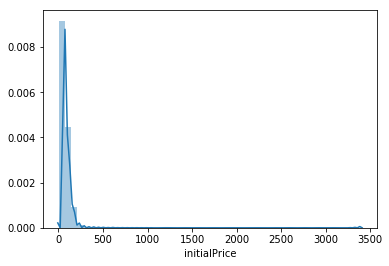

In [36]:
sns.distplot(train.initialPrice.dropna())

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


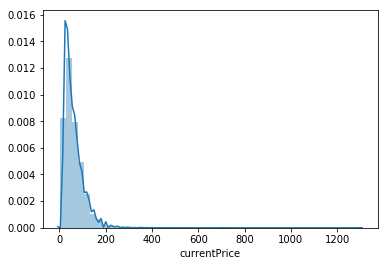

In [38]:
sns.distplot(train.currentPrice.dropna())

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


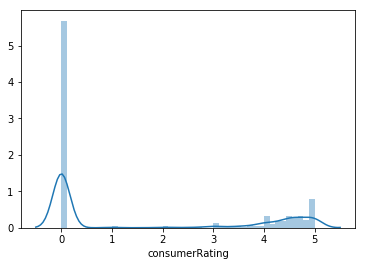

In [39]:
sns.distplot(train.consumerRating.dropna())

In [41]:
# drop non-feature columns
feature_columns = train.columns.drop(['articleId'])
# create multi-index with (count, fraction, number of NaN sequences) per feature column
iterables = [feature_columns,['count','fraction','seq']]
index = pd.MultiIndex.from_product(iterables,names=['feature','stat'])
# use list of IDs as index (only sorted for easier navigation)
ids = train.articleId.unique()
#ids.sort()
# create empty data frame
nan_df = pd.DataFrame(data=None,index=ids,columns=index)

In [43]:
from itertools import groupby
# iterate over all asset ID
for name,group in train.groupby('articleId'):
    # for every feature column
    #print(name)
    for c in feature_columns:
        #print(c)
        # total number of rows with missing data
        nan_count = group[c].isnull().sum()
        # time span this ID was present
        timespan = len(group[c])
        # row indices for missing data
        nan_indices = pd.isnull(group[c]).nonzero()[0]
        # get number of joint time spans of missing values
        nseq = len(list(groupby(enumerate(nan_indices),lambda x:x[0]-x[1])))
        nan_df.loc[name][c,'count'] = nan_count
        nan_df.loc[name][c,'fraction'] = nan_count * 1.0/timespan
        nan_df.loc[name][c,'seq'] = nseq

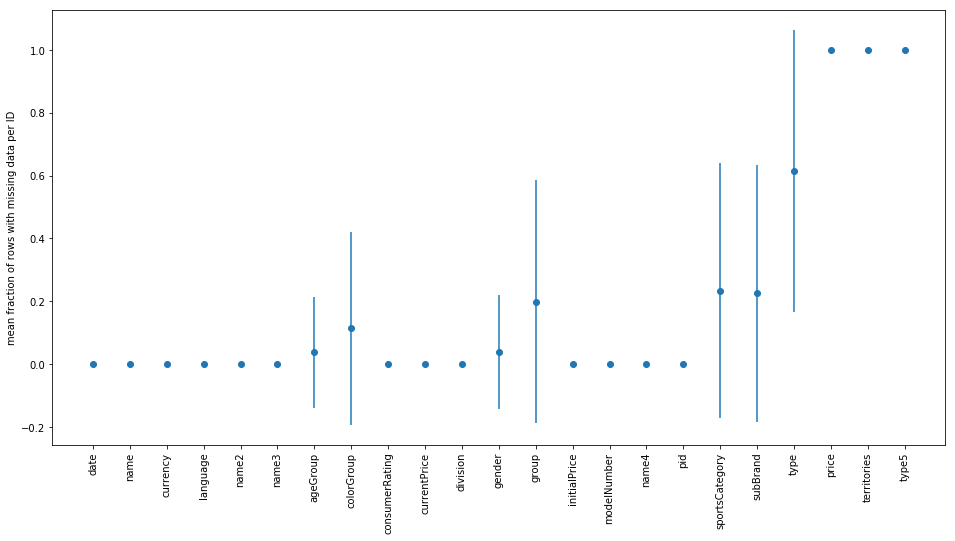

In [44]:
fractions = nan_df.xs('fraction',level='stat',axis=1)
fraction_mean = fractions.mean()
fraction_std = fractions.std()
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(fraction_mean)),fraction_mean.index,rotation='vertical')
plt.errorbar(np.arange(len(fraction_mean)),fraction_mean,yerr=fraction_std,fmt='o')
plt.ylabel('mean fraction of rows with missing data per ID');

In [ ]:
#plt.hist(fractions.values.flatten(),bins=50)
#plt.xlabel('fraction of rows with missing data per ID');

In [46]:
train.name.value_counts()

Nike            120211
adidas           88137
Under Armour     74670
Puma             57907
Reebok           35797
Lululemon        25503
Asics            21472
Hurley            8172
Jordan            8166
Name: name, dtype: int64

In [47]:
train.gender.value_counts()

male      210487
female    148408
unisex     69777
Name: gender, dtype: int64

In [48]:
flattened_data = fractions.values.flatten()

In [49]:
len(flattened_data)

1842967

In [ ]:
#plt.hist(flattened_data,bins=1000)

In [1]:
# final_na_count_df = pd.DataFrame()
# for a in train.articleId.unique():
#     locDF = train.loc[train["articleId"] == a]
#     na_count = locDF.isnull().sum()
#     na_count = pd.DataFrame(na_count)
#     na_count_df = na_count.T
#     na_count_df["Total_Rows"] = len(locDF)
#     final_na_count_df = final_na_count_df.append(locDF)

In [112]:
train.articleId.nunique()

80128

In [133]:
start = time.time()
nan_df_ashish = pd.DataFrame(train.articleId.unique(),columns=['articleId'])
for col in train.columns:
    
    temp = train.groupby('articleId').agg({
                        col: {col: lambda x: x.isna().sum()},
                        'articleId': {'TOTAL_COUNT': lambda x: len(x)}
                              
        
                            })    
    temp.columns = temp.columns.droplevel(0)
    temp['articleId'] = temp.index     
    nan_df_ashish = nan_df_ashish.merge(temp)
end = time.time()
print('TIME taken:'+str(end-start))

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'articleId' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  del sys.path[0]


TIME taken:443.8922669887543


In [136]:
nan_df_ashish.head()

,articleId,date,TOTAL_COUNT,name,currency,language,name2,name3,ageGroup,colorGroup,...,initialPrice,modelNumber,name4,pid,sportsCategory,subBrand,type,price,territories,type5
0,011040,0,12,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,12,12.0,12,12
1,015110,0,12,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,12,12.0,12,12
2,019000,0,8,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,8,8.0,8,8
3,019099,0,8,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,8,8.0,8,8
4,019228,0,12,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0,12,12.0,12,12


In [137]:
impute_columns = ['colorGroup', 'division', 'group', 'name4', 'sportsCategory', 'subBrand', 'type']

In [160]:
unique_df = pd.DataFrame(train.articleId.unique(),columns=['articleId'])
start = time.time()

for col in impute_columns:
    temp = train.groupby('articleId').agg({
     col: {col: lambda x: x.nunique()}    
    })
    temp.columns = temp.columns.droplevel(0)
    temp['articleId'] = temp.index     
    unique_df = unique_df.merge(temp)
    

end = time.time()
print('TIME taken:'+str(end-start))

C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'articleId' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


TIME taken:86.99028944969177


In [156]:
train.groupby('articleId')

22996

In [159]:
train.loc[train.articleId=='00032474X-07H']['division'].nunique()

1

In [161]:
unique_df.head()

,articleId,ageGroup,colorGroup,division,gender,group,name4,sportsCategory,subBrand,type
0,011040,adults,"[schwarz, Black]",Shoes,"[unisex, male]","[Sportschuh, Cleats, Sport Shoes]","[World Cup Fußballschuh, World Cup Cleats, Wor...","[Fußball, Soccer, football]","[Performance, Sport, performance]",NaN
1,015110,adults,"[schwarz, Black]",Shoes,"[unisex, male, female]","[Sportschuh, Cleats, Sport Shoes]","[Copa Mundial Fußballschuh, Copa Mundial Cleat...","[Fußball, Soccer, football]","[Performance, Sport, performance]",NaN
2,019000,adults,"[schwarz, Black]",Shoes,male,"[Sneakers, Sport Shoes]","[Samba Leather Schuh, Samba Leather Shoes]","[Freizeit, lifestyle]","[Performance, performance]",NaN
3,019099,adults,"[schwarz, Black]",Shoes,"[unisex, female]","[Sneakers, Trainers]","[Samba Super Schuh, Samba Super Shoes]","[Freizeit, Lifestyle, lifestyle]",Sport inspired,NaN
4,019228,adults,"[schwarz, Black]",Shoes,"[unisex, male]","[Sneakers, Athletic & Sneakers, Sport Shoes]","[Mundial Team Fußballschuh, Mundial Team Shoes...","[Fußball, Soccer, football]","[Performance, Sport, performance]",NaN
